<a href="https://colab.research.google.com/github/MudassirABBASSi/Computer-Vision/blob/main/Image_Classification_with_ML_%2CANN%2CCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np



In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

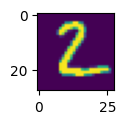

In [49]:
def simple_plot(index):
  plt.figure(figsize=(10,1))
  plt.imshow(x_test[index])
  plt.show()


simple_plot(1)

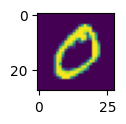

In [10]:
simple_plot(1)


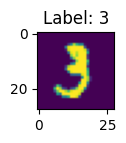

In [11]:
def plot_label(index):
    plt.figure(figsize=(10,1))
    plt.title(f"Label: {y_train[index]}")  # Access the label value and show it as title.
    # plt.axis('off') # Hide axes for cleaner view.
    plt.imshow(x_train[index]) # display the image
    plt.show() # show the plot

plot_label(10)


# Scaling

In [12]:
x_train_s = x_train/255
x_test_s = x_test/255

In [13]:
x_test_s.shape

(10000, 28, 28)

In [14]:
x_test_s.shape

(10000, 28, 28)

In [15]:
y_train_categorical = keras.utils.to_categorical(y_train , num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test , num_classes=10)

In [16]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

#Machine Learning

In [21]:
# As we know that x_test and x_train of all version have same 3D so we need 2D to work in the Machine Learning
x_test_flattened = x_test_s.reshape(x_test_s.shape[0], -1)
x_train_flattened = x_train_s.reshape(x_train_s.shape[0], -1)

In [22]:
from sklearn.tree import DecisionTreeClassifier



clf = DecisionTreeClassifier()
clf.fit(x_train_flattened, y_train)

DecisionTreeClassifier()

In [23]:
from sklearn.metrics import classification_report



y_pred = clf.predict(x_test_flattened)
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.96      1135
           2       0.87      0.85      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.86      0.87      0.87       982
           5       0.83      0.83      0.83       892
           6       0.89      0.88      0.89       958
           7       0.91      0.91      0.91      1028
           8       0.83      0.80      0.82       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



In [35]:
pred = clf.predict(x_test_flattened[100].reshape(1, -1))
print("Prediction",pred)
print("Actual",y_test[100])

Prediction [6]
Actual 6


In [30]:
pred = clf.predict(x_test_flattened[30].reshape(1, -1))
print("Prediction",pred)
print("Actual",y_test[30])

Prediction [3]
Actual 3


In [31]:
# Make predictions on the first 10 test images using the flattened test data
predictions = clf.predict(x_test_flattened[:10])

# Print the predictions and the actual labels for comparison
print("Predicted labels:", predictions)
print("Actual labels:   ", y_test[:10])

Predicted labels: [7 2 1 0 4 1 4 0 6 9]
Actual labels:    [7 2 1 0 4 1 4 9 5 9]


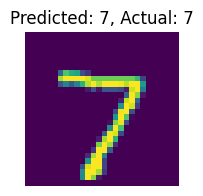

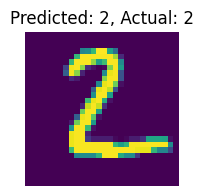

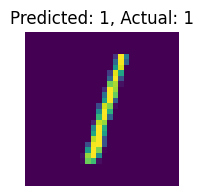

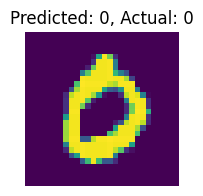

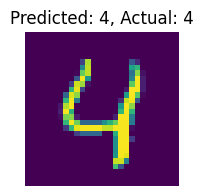

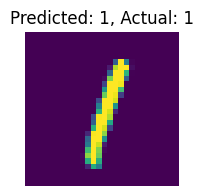

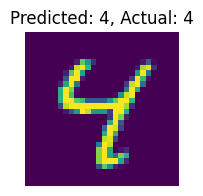

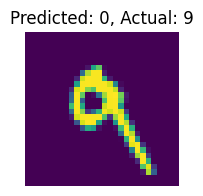

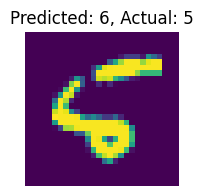

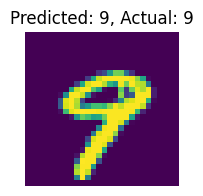

In [32]:
# Visualize the first 10 test images with their predicted and actual labels
for i in range(10):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {predictions[i]}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()

# Deep learning Models

In [ ]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(32, 32, 3)),
#     keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(10, activation='softmax') # Changed to 10 units and softmax for multi-class
# ])
# model.compile(
#     optimizer='sgd',
#     loss='sparse_categorical_crossentropy', # Changed to categorical_crossentropy
#     metrics=['accuracy'] # Corrected 'merticx' to 'metrics'
# )
# model.fit(x_train_s, y_train, epochs=5) # Use y_train instead of y_train_categorical


In [ ]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(32, 32, 3)),
#     keras.layers.Dense(3000, activation='relu'),
#     # keras.layers.Dropout(0.2),
#      keras.layers.Dense(3000, activation='relu'),
#      keras.layers.Dense(3000, activation='relu'),
#     #  keras.layers.Dropout(0.2),
#     keras.layers.Dense(10, activation='softmax') # Changed to 10 units and softmax for multi-class
# ])

# model.compile(
#     optimizer='sgd',
#     loss='categorical_crossentropy', # Changed to categorical_crossentropy
#     metrics=['accuracy'] # Corrected 'merticx' to 'metrics'
# )

# model.fit(x_train_s, y_train_categorical, epochs=5)


In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(3000, activation='relu'),
    # keras.layers.Dropout(0.2),
     keras.layers.Dense(3000, activation='relu'),
     keras.layers.Dense(3000, activation='relu'),
    #  keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax') # Changed to 10 units and softmax for multi-class
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # Changed to categorical_crossentropy
    metrics=['accuracy'] # Corrected 'merticx' to 'metrics'
)

model.fit(x_train_s, y_train_categorical, epochs=3)

Epoch 1/3
 395/1875 ━━━━━━━━━━━━━━━━━━━━ 9:53 401ms/step - accuracy: 0.8046 - loss: 0.6368

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test_s,y_test_categorical)

In [36]:
model.evaluate(x_test_s,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9173 - loss: 0.2922


[0.2552730143070221, 0.9272000193595886]

In [53]:
# Predict on a single test image and reshape the output
y_pred_ann = model.predict(x_test_s[1].reshape(1, 28, 28)).reshape(-1, 1)

print(y_class_ann)
print(y_test[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
2


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step
Predicted class labels for the first 10 test images: [np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9)]


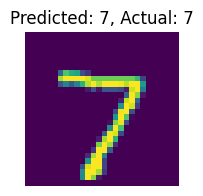

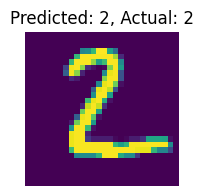

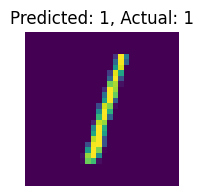

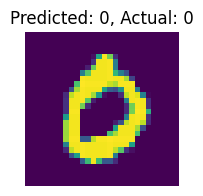

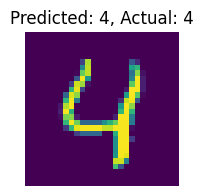

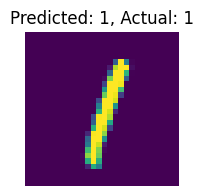

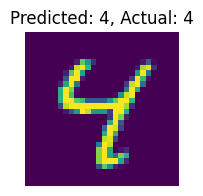

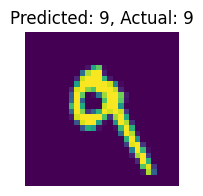

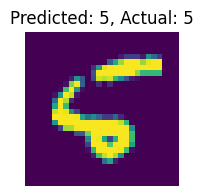

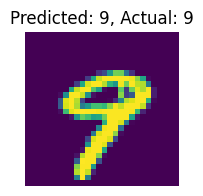

In [41]:
# Make predictions on the test data using the ANN model
y_pred_ann = model.predict(x_test_s)

# Convert the one-hot encoded predictions to class labels
y_class_ann = [np.argmax(element) for element in y_pred_ann]

# Print the first 10 predicted class labels
print("Predicted class labels for the first 10 test images:", y_class_ann[:10])

# Visualize the first 10 test images with their predicted and actual labels from the ANN model
for i in range(10):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i]) # Use original x_test for visualization
    plt.title(f"Predicted: {y_class_ann[i]}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()

In [ ]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(32, 32, 3)),
#     keras.layers.Dense(3000, activation='relu'),
#     keras.layers.Dropout(0.2),
#      keras.layers.Dense(3000, activation='relu'),
#      keras.layers.Dense(3000, activation='relu'),
#      keras.layers.Dropout(0.2),
#     keras.layers.Dense(10, activation='softmax') # Changed to 10 units and softmax for multi-class
# ])

# model.compile(
#     optimizer='sgd',
#     loss='categorical_crossentropy', # Changed to categorical_crossentropy
#     metrics=['accuracy'] # Corrected 'merticx' to 'metrics'
# )

# model.fit(x_train_s, y_train_categorical, epochs=20)


In [ ]:
# cnn_model = keras.Sequential([
#     layers.Conv2D(filters=32, activation='relu', kernel_size=(3, 3), input_shape=(28, 28, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(filters=64, activation='relu', kernel_size=(3, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(10, activation='softmax')
# ])

# cnn_model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

# # Reshape data for CNN input (add channel dimension)
# x_train_cnn = x_train_s.reshape(-1, 28, 28, 1)
# x_test_cnn = x_test_s.reshape(-1, 28, 28, 1)


# cnn_model.fit(x_train_cnn, y_train, epochs=5)

#Convolutation Neural network

In [ ]:
# from tensorflow.keras import layers

# model1 = keras.Sequential([
#                         #  Convolutation layer
#     layers.Conv2D(filters=32,activation='relu',kernel_size =(3,3),input_shape =(32,32,3))  ,
#     layers.MaxPooling2D(2,2),
#                           # Dense Layer
#     keras.layers.Flatten(input_shape=(32, 32, 3)),
#     keras.layers.Dense(3000, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(3000, activation='relu'),
#     keras.layers.Dense(3000, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(10, activation='softmax') # Changed to 10 units and softmax for multi-class
# ])
# model1.compile(
#     optimizer='sgd',
#     loss='sparse_categorical_crossentropy', # Changed to categorical_crossentropy
#     metrics=['accuracy'] # Corrected 'merticx' to 'metrics'
# )
# model1.fit(x_train_s, y_train, epochs=5)


# Multiple Convolutional layers Nural Network

In [ ]:


# model2 = keras.Sequential([
#                         #  Convolutation layer
#     layers.Conv2D(filters=32,activation='relu',kernel_size =(3,3),input_shape =(32,32,3))  ,
#     layers.MaxPooling2D(2,2),
#     layers.Conv2D(filters=62,activation='relu',kernel_size =(3,3),input_shape =(32,32,3))  ,
#     layers.MaxPooling2D(2,2),

#                           # Dense Layer
#     keras.layers.Flatten(input_shape=(32, 32, 3)),
#     keras.layers.Dense(3000, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(3000, activation='relu'),
#     keras.layers.Dense(3000, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(10, activation='softmax') # Changed to 10 units and softmax for multi-class
# ])
# model2.compile(
#     optimizer='sgd',
#     loss='sparse_categorical_crossentropy', # Changed to categorical_crossentropy
#     metrics=['accuracy'] # Corrected 'merticx' to 'metrics'
# )
# model2.fit(x_train_s, y_train, epochs=5)


In [ ]:


# model3 = keras.Sequential([
#                         #  Convolutation layer
#     layers.Conv2D(filters=32,activation='relu',kernel_size =(3,3),input_shape =(32,32,3))  ,
#     layers.MaxPooling2D(2,2),
#     layers.Conv2D(filters=62,activation='relu',kernel_size =(3,3),input_shape =(32,32,3))  ,
#     layers.MaxPooling2D(2,2),
#      layers.Conv2D(filters=102,activation='relu',kernel_size =(3,3),input_shape =(32,32,3))  ,
#     layers.MaxPooling2D(2,2),

#                           # Dense Layer
#     keras.layers.Flatten(input_shape=(32, 32, 3)),
#     keras.layers.Dense(3000, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(3000, activation='relu'),
#     keras.layers.Dense(3000, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(10, activation='softmax') # Changed to 10 units and softmax for multi-class
# ])
# model3.compile(
#     optimizer='sgd',
#     loss='sparse_categorical_crossentropy', # Changed to categorical_crossentropy
#     metrics=['accuracy'] # Corrected 'merticx' to 'metrics'
# )
# model3.fit(x_train_s, y_train, epochs=5)


In [ ]:
cnn = keras.Sequential([
                        #  Convolutation layer
    layers.Conv2D(filters=32,activation='relu',kernel_size =(3,3),input_shape =(28,28,1))  ,
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=62,activation='relu',kernel_size =(3,3))  ,
    layers.MaxPooling2D(2,2),

     layers.Conv2D(filters=102,activation='relu',kernel_size =(3,3))  ,
    layers.MaxPooling2D(2,2),

                          # Dense Layer
    keras.layers.Flatten(),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax') # Changed to 10 units and softmax for multi-class
])
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Changed to categorical_crossentropy
    metrics=['accuracy'] # Corrected 'merticx' to 'metrics'
)
# Reshape data for CNN input (add channel dimension)
x_train_cnn = x_train_s.reshape(-1, 28, 28, 1)
cnn.fit(x_train_cnn, y_train, epochs=10)

# Data Augementation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=15,  # Randomly rotate images within a range
    width_shift_range=0.1,  # Randomly shift images horizontally
    height_shift_range=0.1,  # Randomly shift images vertically
    horizontal_flip=True,  # Randomly flip images horizontally
    zoom_range=0.1 # Randomly zoom images
)

# Reshape training data to include the channel dimension
x_train_s_reshaped = x_train_s.reshape(-1, 28, 28, 1)

# Fit the data generator to your training data
datagen.fit(x_train_s_reshaped)

# Use the data generator to train the model
cnn.fit(datagen.flow(x_train_s_reshaped, y_train, batch_size=32), epochs=1) # Adjust batch size if needed

In [ ]:
# prompt: evalution

# Evaluate the model on the test data
loss, accuracy = cnn.evaluate(x_test_s, y_test) # Use x_test_s instead of x_test
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


In [ ]:
# Reshape test data to include the channel dimension
x_test_cnn = x_test_s.reshape(-1, 28, 28, 1)

# Explicitly build the model with the correct batch input shape
cnn.build(input_shape=(None, 28, 28, 1))

# Evaluate the model on the test data
loss, accuracy = cnn.evaluate(x_test_cnn, y_test, verbose=0)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


y_pred = cnn.predict(x_test_cnn)
y_class  = [np.argmax(element) for element in y_pred]

# Compare predictions with actual values for the first 10 images
for i in range(10):
    print(f"Image {i+1}:")
    print(f"  Predicted class: {y_class[i]}")
    print(f"  Actual class: {y_test[i]}")

    # Optional: Display the image and its label
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {y_class[i]}, Actual: {y_test[i]}")
    # plt.show()

In [ ]:
# Redefine and recompile the CNN model
cnn = keras.Sequential([
                        #  Convolutation layer
    layers.Conv2D(filters=32,activation='relu',kernel_size =(3,3),input_shape =(28,28,1))  ,
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=62,activation='relu',kernel_size =(3,3))  ,
    layers.MaxPooling2D(2,2),

     layers.Conv2D(filters=102,activation='relu',kernel_size =(3,3))  ,
    layers.MaxPooling2D(2,2),

                          # Dense Layer
    keras.layers.Flatten(),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax') # Changed to 10 units and softmax for multi-class
])
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Changed to categorical_crossentropy
    metrics=['accuracy'] # Corrected 'merticx' to 'metrics'
)

In [ ]:
# Reshape test data to include the channel dimension
x_test_cnn = x_test_s.reshape(-1, 28, 28, 1)

# Evaluate the model on the test data
loss, accuracy = cnn.evaluate(x_test_cnn, y_test, verbose=0)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

In [ ]:
# Reshape test data to include the channel dimension (if not already done)
x_test_cnn = x_test_s.reshape(-1, 28, 28, 1)

y_pred = cnn.predict(x_test_cnn)
y_class  = [np.argmax(element) for element in y_pred]

# Compare predictions with actual values for the first 10 images
for i in range(10):
    print(f"Image {i+1}:")
    print(f"  Predicted class: {y_class[i]}")
    print(f"  Actual class: {y_test[i]}")

    # Optional: Display the image and its label
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {y_class[i]}, Actual: {y_test[i]}")
    # plt.show()

In [ ]:
# Reshape test data to include the channel dimension
x_test_cnn = x_test_s.reshape(-1, 28, 28, 1)

# Evaluate the model on the test data
loss, accuracy = cnn.evaluate(x_test_cnn, y_test, verbose=0)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

In [ ]:
# Reshape test data to include the channel dimension (if not already done in the previous cell)
x_test_cnn = x_test_s.reshape(-1, 28, 28, 1)

y_pred = cnn.predict(x_test_cnn)
y_class  = [np.argmax(element) for element in y_pred]

# Compare predictions with actual values for the first 10 images
for i in range(10):
    print(f"Image {i+1}:")
    print(f"  Predicted class: {y_class[i]}")
    print(f"  Actual class: {y_test[i]}")

    # Optional: Display the image and its label
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {y_class[i]}, Actual: {y_test[i]}")
    # plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_class)
print(cm)

# Assuming you have y_test and y_class defined
print(classification_report(y_test, y_class))

In [ ]:
cnn.evaluate(x_test,y_test)